In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical Quadrature



Quadrature formulas are methods to approximate the integral $\int_{a}^b f(x)dx$ of a specified function $f(x)$.

We will check all the numerical quadrature methods for the following integral:
$$
\int_{0}^{1} x^2 dx = \frac{1}{3}
$$

In [2]:
def f(x):
    return x**2

# the integral is analytically= (x^3/3) at x=1, which is 1/3.
I_exact = 1/3

print("Exact value of the integral: ", I_exact)

Exact value of the integral:  0.3333333333333333


### Midpoint rule and composite midpoint rule

Recall that the simple midpoint formula is an open Newton-Cotes formula that approximates the integral of $f$ over $[a,b]$ as
$$
\int_{a}^{b} f(x) d x \approx (b-a) f \left(\frac{a+b}{2}\right).
$$
This corresponds to computing the area of this rectangle:
<center>
<img src="auxiliary_images/midpoint.png" width="200">
</center>

For the composite formula, we divide the interval $[a,b]$ into $m$ subintervals $T_j:=[x_j,x_{j+1}],\ j=0,\ldots,m-1$ of width $H=\frac{b-a}{m}$ with endpoints $x_j=a+jH,\ j=0,\ldots, m$.
Applying the midpoint formula to each subinterval, we obtain the corresponding composite formula 
$$    
\int_{a}^{b} f(x) d x = \sum_{j=0}^{m-1} \int_{T_j} f(x) d x \approx H \sum_{j=0}^{m-1} f(\bar x_j),
$$where $\bar x_j:=\frac{x_j+x_{j+1}}{2}$ is the midpoint of the subinterval $T_j$.
Since we only want to use the quadrature nodes $\bar x_j$ and the corresponding values of the integrand function, we observe that, in the case of equally spaced nodes, $H$ coincides with the distance between any two consecutive nodes.

This corresponds to computing the sum of the areas of many small rectangles:
<center>
<img src="auxiliary_images/composite_midpoint.png" width="200">
</center>

In [3]:
def rect(grid, f, composite=True):
    '''
    Quadrature by composite rectangles method.
    '''
    if not composite:
        print(grid[0], grid[-1])
        H = grid[-1] - grid[0]
        midpoint = (grid[-1] + grid[0])/2
        y = f(midpoint)
        return H * y
    else:
        #h = grid[1]-grid[0]
        #x = np.array([grid[i]+h/2 for i in range(len(grid)-1)])
        #y = f(x)
        h = np.array([grid[i+1] - grid[i] for i in range(len(grid) - 1)])
        x = np.array([grid[i] + h[i]/2 for i in range(len(grid) - 1)])
        y = f(x)
        return np.dot(y, h)#h*np.sum(y) 

In [4]:
n = 100

grid = np.linspace(0, 1, n)
#grid = sorted(np.random.rand(n))
I_rect = rect(grid, f, composite=True)

print(I_rect)

0.33332483079957825


### Trapezoidal (composite) rule

We can approximate the integral by computing the area of the following regions, either in a non-composite (a unique region) or in a composite way (sum of different regions):

<center>
<img src="auxiliary_images/trapezoidal.png" width="200">
<img src="auxiliary_images/composite_trapezoidal.png" width="200">
</center>

We divide the interval $[a,b]$ into $m$ subintervals $T_j=[x_j,x_{j+1}]$ of width $H=\frac{b-a}{m}$, where $x_j=a+jH,\ j=0,\ldots,m$; by linearity we can write
$$
    \int_{a}^{b} f(x) \, dx = \sum_{j=0}^{m-1} \int_{x_j}^{x_{j+1}} f(x) \, dx.
$$
Approximating each term using the simple trapezoidal formula:
$$
    \int_{x_j}^{x_{j+1}} f(x) \, dx \approx \frac{H}{2} \left[ f(x_j)+ f(x_{j+1}) \right], 
$$
we obtain 
$$
    \int_{a}^{b} f(x) \, dx \approx \frac{H}{2} \sum_{j=0}^{m-1}\left[ f(x_j)+ f(x_{j+1})\right]
$$
and rearranging the sum we obtain the composite trapezoidal formula:
$$
    \int_{a}^{b} f(x) \, dx \approx \frac{H}{2}\left[ f(a) + 2 \sum_{j=1}^{m-1} f(x_j) + f(b) \right],
$$

In [5]:
def trap(grid, f):
    '''
    Quadrature by composite trapezoids method
    '''
    h = grid[1]-grid[0]
    x = np.array(grid)
    y = f(x)
    return h*(0.5*y[0]+np.sum(y[1:-1])+0.5*y[-1])

In [6]:
I_trap = trap(grid, f)
print(I_trap)

0.33335033840084355


### Simpson's 1/3 rule

The Cavalieri-Simpson method consists of approximating the function with a Lagrange interpolant of degree 2: $f \sim \Pi_2 f$. In the composite version, we find a Lagrange interpolant for each subinterval. Graphically, this is how it looks:

<center>
<img src="auxiliary_images/simpson.png" width="200">
<img src="auxiliary_images/composite_simpson.png" width="200">
</center>

Proceeding as for the composite trapezoidal formula, we obtain the composite Cavalieri-Simpson formula by applying the simple Cavalieri-Simpson formula on $m$ subintervals $T_j=[x_j,x_{j+1}]$ of $[a,b]$ of width $H=\frac{b-a}{m}$ with endpoints $x_j=a+jH,\ j=0,\ldots,m$:
$$
    \int_{a}^{b} f(x) \, dx \approx \frac{H}{6} \left[ f(a) + 2 \sum_{j=1}^{m-1} f(x_j) + 4 \sum_{j=0}^{m-1} f\left( x_j +\frac{H}{2}\right) + f(b) \right]
$$



In [7]:
def simp(grid, f):
    '''
    Quadrature by composite Simpson's method
    '''
    h = grid[1]-grid[0]

    y = f(grid)
    y2 = f(grid[:-1]+h/2)
    
    Q = y[0]+y[-1]
    Q += 2*np.sum(y[1:-1])
    Q += 4*np.sum(y2)
        
    return h/6*Q

In [8]:
I_simp = simp(grid, f)

print("Exact value of the integral: ", I_exact)
print("Rectangles method: ", I_rect, "    Error: ", abs(I_rect-I_exact))
print("Trapezoids method: ", I_trap, "    Error: ", abs(I_trap-I_exact))
print("Simpson's method : ", I_simp, "    Error: ", abs(I_simp-I_exact))


Exact value of the integral:  0.3333333333333333
Rectangles method:  0.33332483079957825     Error:  8.502533755061492e-06
Trapezoids method:  0.33335033840084355     Error:  1.7005067510234007e-05
Simpson's method :  0.3333333333333335     Error:  1.6653345369377348e-16



## Error estimates

### Composite midpoint rule
$$
\left\vert \tilde{R}_0^{\mathsf{C}}\right\vert \leq \frac{1}{24}\frac{(b-a)^3}{m^2} \left\Vert f''\right\Vert_\infty.
$$

To obtain a tolerance $\varepsilon$ we need to choose $m$ such that 
$$
m \geq \sqrt{\frac{1}{24}\frac{(b-a)^3}{\varepsilon} \left\Vert f''\right\Vert_\infty} .
$$

### Composite trapezoidal rule
$$
\left\vert \tilde{R}_1^{\mathsf{C}}\right\vert \leq \frac{1}{12}\frac{(b-a)^3}{m^2} \left\Vert f''\right\Vert_\infty.
$$

To obtain a tolerance $\varepsilon$ we need to choose $m$ such that 
$$
m \geq \sqrt{\frac{1}{12}\frac{(b-a)^3}{\varepsilon} \left\Vert f''\right\Vert_\infty} .
$$

### Composite Simpson's rule
$$
\left\vert \tilde{R}_2^{\mathsf{C}}\right\vert \leq \frac{1}{2880}\frac{(b-a)^5}{m^4} \left\Vert f^{(4)}\right\Vert_\infty.
$$
To obtain a tolerance $\varepsilon$ we need to choose $m$ such that 
$$
m \geq \sqrt[4]{\frac{1}{2880}\frac{(b-a)^5}{\varepsilon} \left\Vert f^{(4)}\right\Vert_\infty} .
$$

## Example

Let us consider the function integral 
$$
I = \int_0^{1} x^5 dx = \frac{1}{6}.
$$

In [27]:
import sympy as sym

x = sym.symbols('x')
f = x**5

f_num = lambda X : sym.lambdify(x, f)(X)

I_exact = 1/6

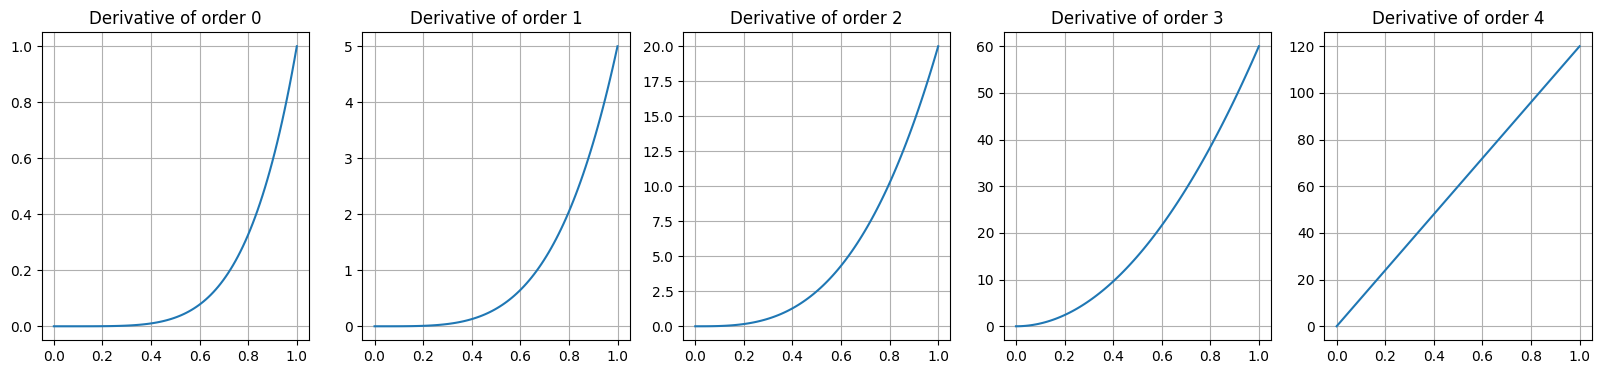

In [36]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
X = np.linspace(0, 1, 100)
b = X[-1]
a = X[0]
for index, ax in enumerate(axs):
    ax.plot(X, sym.lambdify(x, sym.diff(f, x, index))(X))
    ax.set_title('Derivative of order ' + str(index))
    ax.grid()

plt.show()

Looking at the plots we can estimate the infinity norms of the derivatives and therefore the number of nodes needed to reach a certain tolerance.

In [39]:
N_rect = lambda tol : np.ceil(np.sqrt(1/24 * ((b-a)**3)/tol * np.abs(np.max(sym.lambdify(x, sym.diff(f, x, 2))(X)))))
N_trap = lambda tol : np.ceil(np.sqrt(1/12 * ((b-a)**3)/tol * np.abs(np.max(sym.lambdify(x, sym.diff(f, x, 2))(X)))))
N_simp = lambda tol : np.ceil((1/2880 * ((b-a)**5)/tol * np.abs(np.max(sym.lambdify(x, sym.diff(f, x, 4))(X))))**(1/4))


tolerances = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
N_values = {
    'Tolerance': tolerances,
    'N_rect': [N_rect(tol) for tol in tolerances],
    'N_trap': [N_trap(tol) for tol in tolerances],
    'N_simp': [N_simp(tol) for tol in tolerances]
}

import pandas as pd
N_df = pd.DataFrame(N_values)
N_df

,Tolerance,N_rect,N_trap,N_simp
0,1.000000e-06,913.0,1291.0,15.0
1,1.000000e-07,2887.0,4083.0,26.0
2,1.000000e-08,9129.0,12910.0,46.0
3,1.000000e-09,28868.0,40825.0,81.0
4,1.000000e-10,91288.0,129100.0,143.0


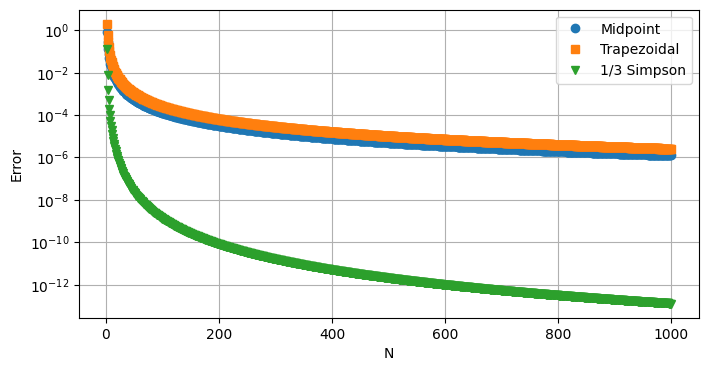

In [33]:
range_log = range(2, 1000)

errs_rect = []
errs_trap = []
errs_simp = []
for n in range_log:
    n = int(n)
    grid = np.linspace(0, 1, n)
    I_rect = rect(grid, f_num)
    I_trap = trap(grid, f_num)
    I_simp = simp(grid, f_num)
    errs_rect.append(abs(I_rect-I_exact)/I_exact)
    errs_trap.append(abs(I_trap-I_exact)/I_exact)
    errs_simp.append(abs(I_simp-I_exact)/I_exact)

fig, axs = plt.subplots(1, 1, figsize=(8, 4))
axs.semilogy(range_log, errs_rect, 'o', label="Midpoint")
axs.semilogy(range_log, errs_trap, 's', label="Trapezoidal")
axs.semilogy(range_log, errs_simp, 'v', label="1/3 Simpson")
axs.set_xlabel('N')
axs.set_ylabel('Error')
axs.grid()
plt.legend()
plt.show()

### Some other quadrature methods: Gauss quadrature

We can approximate the integral in the following way:
$$\int_{a}^b f(x) dx \approx \sum_{i=0}^m f(x_i) w_i,$$

which leads to precision of degree $2m+1$ is the chosen nodes $\{x_0, \dots, x_m\}$ are the zeros of an orthogonal polynomial $P_{m+1}(x)$ in $[a, b]$ with respect to a weight function $w(x)$.

The weights can be defined as:
$$ w_i = \int_{a}^b l_i(x) dx, $$
where $l_i$ is the coefficient of the Lagrange polynomial of order $i$.

The maximum degree of exactness of Gauss quadrature formulas is $2m+1$.

Let's see now an example using Gauss-Legendre quadrature.

In [102]:
from numpy import polynomial
from numpy.polynomial import legendre

How the Legendre basis look like?

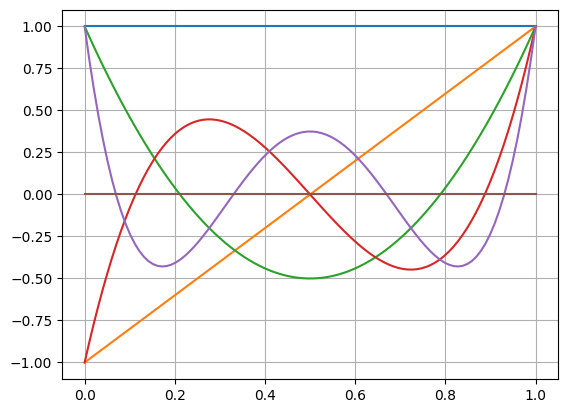

In [109]:
n = 5
V = [Legendre.basis(i, (0, 1)) for i in range(n)]

x = np.linspace(0, 1, 100)
_ = [plt.plot(x, V[i](x)) for i in range(n)]
_ = plt.plot(x, 0*x)
plt.grid()

In [111]:
def gauss(d, interval=(0,1)):
    '''
    Compute the Gauss-Legendre nodes and weights in a specific interval.
    '''
    q, w = legendre.leggauss(d) # get Gauss-Legendre nodes and weights in [-1, 1]
    q = (q+1)/2*(interval[1]-interval[0])+interval[0] # scale nodes to interval
    w = w/2*(interval[1]-interval[0]) # scale weights to interval
    return q, w

Let's visualize the Gauss-legendre nodes and the corresponding weights, for different numbers of nodes.

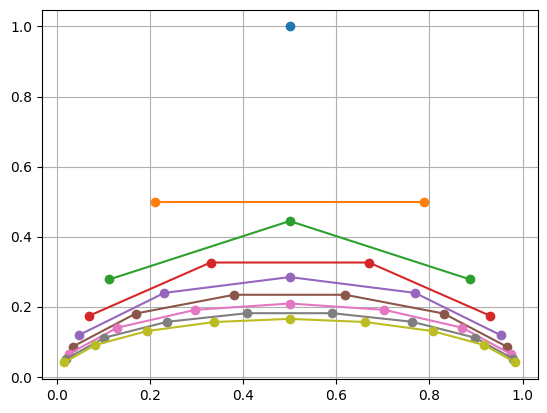

In [105]:
for i in range(1, 10):
    q, w = gauss(i)
    _ = plt.plot(q, w, 'o-')
plt.grid()

Compute the exact integral for a simple polynomial function and a function to check the error between the exact integral value and the approximated one.

In [106]:
def exact(d, interval=(0,1)):
    """
    Exact integral of x**d between interval[0] and interval[1]
    """
    return (interval[1]**(d+1)-interval[0]**(d+1))/(d+1)

In [112]:
def check_error(fun, exact_value, n, interval=(0,1)):
    """
    Check the error between integral(fun, interval) and exact with n quadrature points
    """
    q, w = gauss(n, interval)
    return np.abs(fun(q).dot(w)-exact_value)

We can visualize how the error varies increasing the number of nodes and also for different functions.

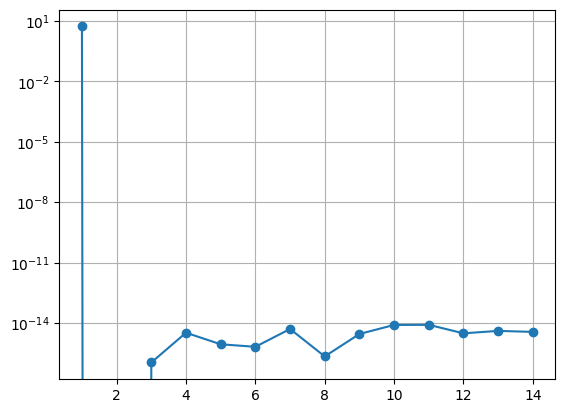

In [125]:
#interval = (0, np.pi)
interval = (-1, 1)
points = list(range(1, 15))

deg = 5
def poly(x):
    return x**(deg)

def myfun(x):
    return 7*(x**3) - 8*x**2 -3*x + 3

def int_myfun(interval):
    int_b = 7/4*interval[-1]**4 - 8/3*interval[-1]**3 - 3/2*interval[-1]**2 + 3*interval[-1]
    int_a = 7/4*interval[0]**4 - 8/3*interval[0]**3 - 3/2*interval[0]**2 + 3*interval[0]
    return int_b - int_a

#errors = [check_error(np.sin, 2, p, interval) for p in points]
#errors = [check_error(poly, exact(deg, interval), p, interval) for p in points]
errors = [check_error(myfun, int_myfun(interval), p, interval) for p in points]

plt.semilogy(points, errors, 'o-')
plt.grid()

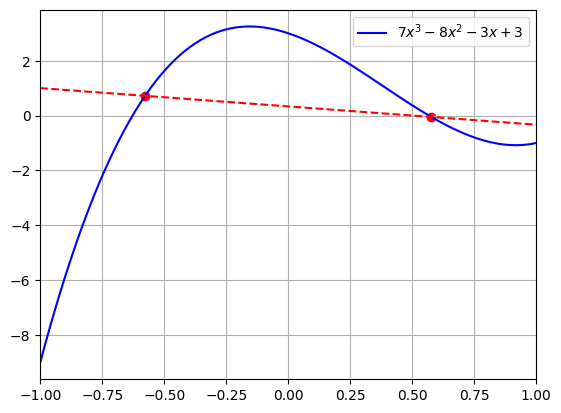

In [141]:
def line(p1, p2, x):
    x1, y1 = p1
    x2, y2 = p2
    
    if x2 == x1: 
        return None, x1 
    m = (y2 - y1) / (x2 - x1)
    q = y1 - m * x1
    return m*x + q

x = np.linspace(-1, 1, 100)
gauss_nodes, _ = gauss(2, interval=interval)

line_nodes = line((gauss_nodes[0], myfun(gauss_nodes[0])), (gauss_nodes[1], myfun(gauss_nodes[1])), x)


plt.plot(x, myfun(x), 'b', label=r"$7x^3 - 8x^2-3x + 3$")
plt.scatter(gauss_nodes, myfun(gauss_nodes), c='r')
plt.plot(x, line_nodes, "r--")
plt.xlim(-1, 1)
plt.grid()
plt.legend()
plt.show()